In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import cv2

from skimage import color
from scipy.signal import convolve

In [3]:
def richardson_lucy(image, psf, num_iter=50):
   """Richardson-Lucy deconvolution.

   Parameters
   ----------
   image : ndarray
      Input degraded image (can be N dimensional).
   psf : ndarray
      The point spread function.
   num_iter : int, optional
      Number of iterations. This parameter plays the role of
      regularisation.

   Returns
   -------
   im_deconv : ndarray
      The deconvolved image.

   References
   ----------
   .. [1] https://en.wikipedia.org/wiki/Richardson%E2%80%93Lucy_deconvolution
   """
   im_deconv = np.full(image.shape, 0.5, dtype=image.dtype)
   psf_mirror = np.flip(psf)

   # Small regularization parameter used to avoid 0 divisions
   eps = 1e-12

   for _ in range(num_iter):
      conv = convolve(im_deconv, psf, mode='same') + eps
      relative_blur = image / conv
      im_deconv *= convolve(relative_blur, psf_mirror, mode='same')
   
   im_deconv[im_deconv > 1] = 1
   im_deconv[im_deconv < -1] = -1

   return im_deconv

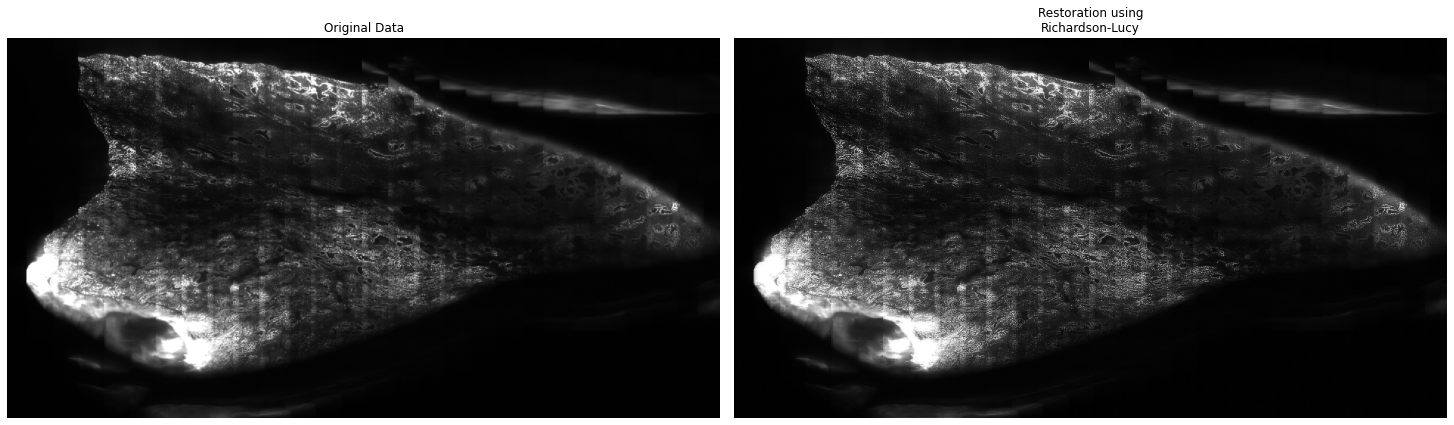

In [4]:
img = color.rgb2gray(cv2.imread('/Users/raywang/Desktop/Graduate3/ME574/Project/microscdecon/data/mol5.png'))

psf = np.ones((5, 5))/25

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = richardson_lucy(img, psf)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 12))
plt.gray()

for a in (ax[0], ax[1]):
       a.axis('off')

ax[0].imshow(img)
ax[0].set_title('Original Data')

ax[1].imshow(deconvolved_RL)
ax[1].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()
image.imsave(('/Users/raywang/Desktop/Graduate3/ME574/Project/microscdecon/data/mol5_deconv.png'), deconvolved_RL)